# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
base_url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):    # DEBUG 
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + '&q=' + city    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
  

    try:
        response = requests.get(city_url)
        city_weather = response.json()
#         # Parse the JSON and retrieve data

#         Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | neiafu
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | coruripe
Processing Record 5 of Set 1 | lima
Processing Record 6 of Set 1 | chernyshevskiy
Processing Record 7 of Set 1 | miranda de ebro
Processing Record 8 of Set 1 | high level
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | tamandare
Processing Record 15 of Set 1 | rosarito
Processing Record 16 of Set 1 | namatanai
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | georgetown
Processing Rec

Processing Record 35 of Set 4 | chimbote
Processing Record 36 of Set 4 | meyungs
City not found. Skipping...
Processing Record 37 of Set 4 | ust-nera
Processing Record 38 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 41 of Set 4 | bhadasar
Processing Record 42 of Set 4 | guerrero negro
Processing Record 43 of Set 4 | ampanihy
Processing Record 44 of Set 4 | kirakira
Processing Record 45 of Set 4 | ndele
Processing Record 46 of Set 4 | mocuba
Processing Record 47 of Set 4 | labutta
City not found. Skipping...
Processing Record 48 of Set 4 | bereda
Processing Record 49 of Set 4 | urusha
Processing Record 0 of Set 5 | saint-philippe
Processing Record 1 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 2 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 5 | russell
Processing Record 4 of Set 5 | sala

Processing Record 21 of Set 8 | paamiut
Processing Record 22 of Set 8 | haines junction
Processing Record 23 of Set 8 | olafsvik
Processing Record 24 of Set 8 | santa maria
Processing Record 25 of Set 8 | namibe
Processing Record 26 of Set 8 | okandja
City not found. Skipping...
Processing Record 27 of Set 8 | manzanillo
Processing Record 28 of Set 8 | lahat
Processing Record 29 of Set 8 | collie
Processing Record 30 of Set 8 | kavaratti
Processing Record 31 of Set 8 | gornyy
Processing Record 32 of Set 8 | juneau
Processing Record 33 of Set 8 | talnakh
Processing Record 34 of Set 8 | alta floresta
Processing Record 35 of Set 8 | yertsevo
Processing Record 36 of Set 8 | nyurba
Processing Record 37 of Set 8 | dongsheng
Processing Record 38 of Set 8 | merauke
Processing Record 39 of Set 8 | aloleng
Processing Record 40 of Set 8 | peleduy
Processing Record 41 of Set 8 | port antonio
Processing Record 42 of Set 8 | mattru
Processing Record 43 of Set 8 | vestbygda
City not found. Skipping..

Processing Record 8 of Set 12 | aras
Processing Record 9 of Set 12 | hasaki
Processing Record 10 of Set 12 | praxedis guerrero
Processing Record 11 of Set 12 | dudinka
Processing Record 12 of Set 12 | port blair
Processing Record 13 of Set 12 | campina verde
Processing Record 14 of Set 12 | grindavik
Processing Record 15 of Set 12 | thunder bay
Processing Record 16 of Set 12 | mackay
Processing Record 17 of Set 12 | vorontsovka
Processing Record 18 of Set 12 | baruun-urt
Processing Record 19 of Set 12 | viedma
Processing Record 20 of Set 12 | sambava
Processing Record 21 of Set 12 | rujewa
Processing Record 22 of Set 12 | maceio
Processing Record 23 of Set 12 | taman
Processing Record 24 of Set 12 | am timan
Processing Record 25 of Set 12 | totskoye
Processing Record 26 of Set 12 | camopi
Processing Record 27 of Set 12 | tapa
Processing Record 28 of Set 12 | montanha
Processing Record 29 of Set 12 | russellville
Processing Record 30 of Set 12 | kollam
Processing Record 31 of Set 12 | a

In [11]:
city_weather

{'coord': {'lon': -54.3333, 'lat': -34.4833},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 15.72,
  'feels_like': 15.51,
  'temp_min': 15.72,
  'temp_max': 15.72,
  'pressure': 1019,
  'humidity': 83,
  'sea_level': 1019,
  'grnd_level': 1015},
 'visibility': 10000,
 'wind': {'speed': 2.82, 'deg': 41, 'gust': 6.77},
 'clouds': {'all': 95},
 'dt': 1672967546,
 'sys': {'country': 'UY', 'sunrise': 1672907478, 'sunset': 1672959213},
 'timezone': -10800,
 'id': 3440777,
 'name': 'Rocha',
 'cod': 200}

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,neiafu,-18.6500,-173.9833,27.38,89,75,4.12,TO,1672967891
1,ushuaia,-54.8000,-68.3000,18.81,48,100,8.23,AR,1672967892
2,faanui,-16.4833,-151.7500,27.75,64,13,4.45,PF,1672967895
3,coruripe,-10.1256,-36.1756,25.19,83,1,5.93,BR,1672967660
4,lima,-12.0432,-77.0282,23.83,68,0,5.14,PE,1672967449


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,neiafu,-18.6500,-173.9833,27.38,89,75,4.12,TO,1672967891
1,ushuaia,-54.8000,-68.3000,18.81,48,100,8.23,AR,1672967892
2,faanui,-16.4833,-151.7500,27.75,64,13,4.45,PF,1672967895
3,coruripe,-10.1256,-36.1756,25.19,83,1,5.93,BR,1672967660
4,lima,-12.0432,-77.0282,23.83,68,0,5.14,PE,1672967449


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

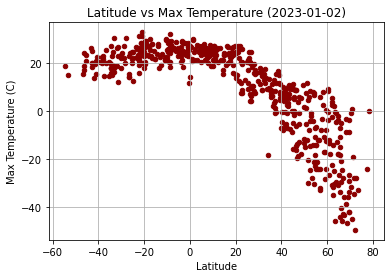

In [16]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', c= 'DarkRed')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude vs Max Temperature (2023-01-02)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

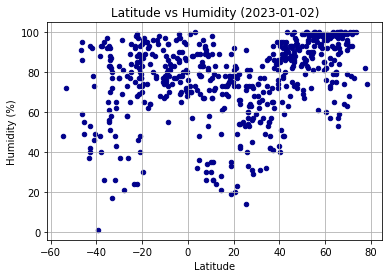

In [17]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', c= 'DarkBlue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity (2023-01-02)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

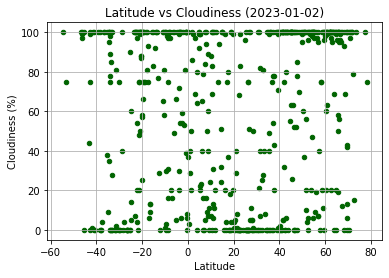

In [18]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', c= 'DarkGreen')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness (2023-01-02)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

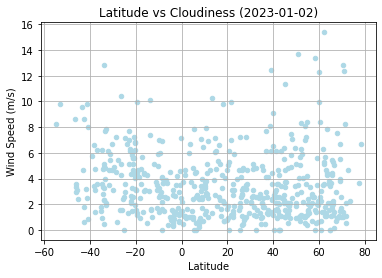

In [19]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', c= 'LightBlue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Cloudiness (2023-01-02)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def lin_regression(hemi,x,y,a,b):
    x_value = hemi[x]
    y_value = hemi[y]
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    plt.plot(x_value,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    print(line_eq)
        

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,chernyshevskiy,63.0128,112.4714,-30.46,98,100,1.22,RU,1672967896
6,miranda de ebro,42.6865,-2.9470,3.32,73,6,1.98,ES,1672967896
7,high level,58.5169,-117.1360,-16.94,92,20,1.54,CA,1672967718
11,nome,64.5011,-165.4064,-3.96,75,100,3.60,US,1672967448
12,hilo,19.7297,-155.0900,26.85,78,20,4.63,US,1672967580


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,neiafu,-18.6500,-173.9833,27.38,89,75,4.12,TO,1672967891
1,ushuaia,-54.8000,-68.3000,18.81,48,100,8.23,AR,1672967892
2,faanui,-16.4833,-151.7500,27.75,64,13,4.45,PF,1672967895
3,coruripe,-10.1256,-36.1756,25.19,83,1,5.93,BR,1672967660
4,lima,-12.0432,-77.0282,23.83,68,0,5.14,PE,1672967449


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7305389778977854
y = -0.79x +33.29


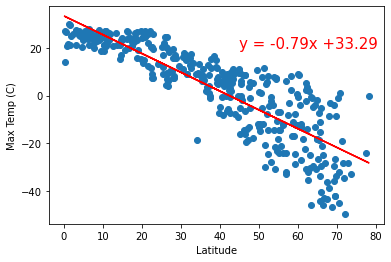

In [23]:
# Linear regression on Northern Hemisphere
lin_regression(northern_hemi_df,'Lat', 'Max Temp', 45,20)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()


The r-value is: 0.19745782182957233
y = 0.15x +26.1


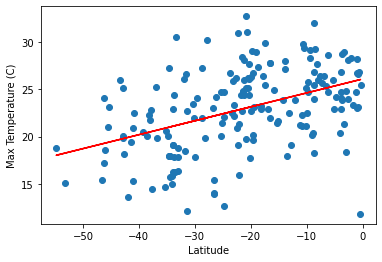

In [24]:
# Linear regression on Southern Hemisphere
lin_regression(southern_hemi_df,'Lat', 'Max Temp',-30,35)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()



**Discussion about the linear relationship:** In the northern hemisphere, there is a pretty strong negative correlation between latitude and max temperature. The slope between the two points for the cities is somewhat steep in a downward direction.

In the southern hemisphere, the relationship between latitude and max temperature is not as strong however has a slightly positive relationship. The slope of the linear regression line is relatively flat with a slight upward facing slope.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20560965687713584
y = 0.43x +60.46


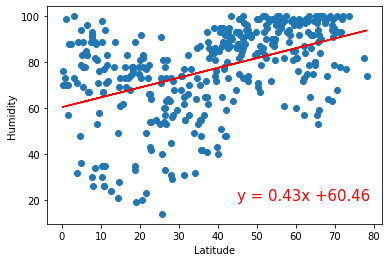

In [25]:
# Northern Hemisphere
lin_regression(northern_hemi_df, 'Lat', 'Humidity',45,20)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.10754257537286219
y = 0.48x +85.05


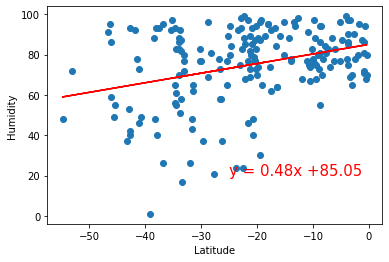

In [26]:
# Southern Hemisphere
lin_regression(southern_hemi_df, 'Lat', 'Humidity', -25,20)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere, there is a slight positive relationship (more so than the southern hemisphere) between latitude and humidity. The slope is relatively flat slightly increasing by a factor of .48X meaning the higher up the latitude gets the more humidity you will see.

In the southern hemisphere, there is a slight positive relationship between latitude and humidity. The slope is relatively flat with a slight increase meaning the higher up the latitude gets the more humidity you will see.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08288903036035425
y = 0.59x +35.3


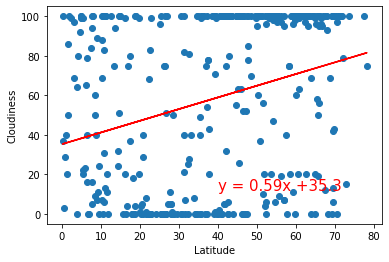

In [27]:
# Northern Hemisphere
lin_regression(northern_hemi_df,'Lat', 'Cloudiness',40,12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.009375812123821018
y = 0.31x +66.85


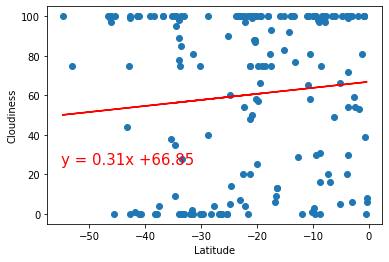

In [28]:
# Southern Hemisphere
lin_regression(southern_hemi_df, 'Lat', 'Cloudiness', -55,25)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 

In the northern hemisphere, there is slightly positive relationship between latitude and cloudiness. At .08, there is a high level of variability between the two sets of data. The slope is trending upward very slightly in direction meaning as the latitude increases, the level of cloudiness can be expected to increase very slightly.

There is barely a positive relationship between Southern Hemisphere's Latitude and Cloudiness, with a slightly positive slope. This means as the latitude of the city increases towards zero, the percentage of cloudiness increases slightly.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0046343126503912415
y = 0.01x +2.9


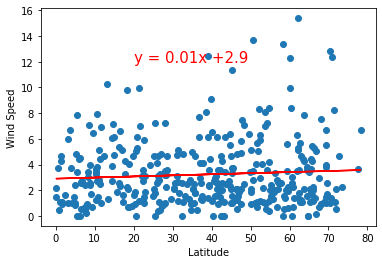

In [29]:
# Northern Hemisphere
lin_regression(northern_hemi_df, 'Lat', 'Wind Speed', 20, 12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: 0.10643301105101331
y = -0.06x +2.57


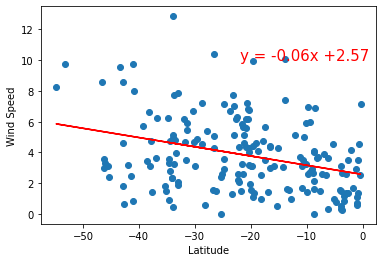

In [30]:
# Southern Hemisphere
lin_regression(southern_hemi_df, "Lat", 'Wind Speed', -22,10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere, there is barely any relationship between latitude and wind speed. The relationship that exists is very slightly positive. The slope is essentially flat.

There is a very slight positive correlation between latitude and wind speed in the southern hemisphere. The slope is negative meaning as the latitude increases, the wind speed decreases.